In [72]:
import tensorflow as tf
import os

In [73]:
# Creating Essential Path as Constants
WORK_DIR = os.path.abspath(os.path.curdir)
HAPPY_DIR = os.path.join(WORK_DIR, 'happy')
SAD_DIR = os.path.join(WORK_DIR, 'sad')

In [74]:
if os.path.exists(HAPPY_DIR):
    print(HAPPY_DIR)
if os.path.exists(SAD_DIR):
    print(SAD_DIR)

### Remove Dodgy Images
#### Loading of Data

In [75]:
import cv2
import imghdr

In [76]:
EXTENSIONS = ['jpg', 'jpeg', 'png', 'bmp']

In [77]:
for folders in os.listdir(WORK_DIR):
    for file in os.listdir(os.path.join(WORK_DIR, folders)):
        image_path = os.path.join(WORK_DIR, folders, file)
        try:
            img = cv2.imread(image_path)
            tip = str(imghdr.what(image_path))
            print(tip not in EXTENSIONS, tip, EXTENSIONS)
            if tip not in EXTENSIONS:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with the image {}".format(image_path))
            # os.remove(image_path)

Issue with the image D:\Study\AI_Notebooks\deep learning\image_classification\data\happy
Issue with the image D:\Study\AI_Notebooks\deep learning\image_classification\data\sad


NotADirectoryError: [WinError 267] The directory name is invalid: 'D:\\Study\\AI_Notebooks\\deep learning\\image_classification\\main.ipynb'

### Load Data

In [78]:
import numpy as np
from matplotlib import pyplot as plt

In [79]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8)

Found 119 files belonging to 2 classes.


In [80]:
# This creates a Generator Function .....
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000016FD55D79B0>)

In [81]:
# Get another batch from the iterator
batch = next(data_iterator)

In [82]:
# This is Images represented as numpy arrays ...
batch[0].max()

np.float32(255.0)

In [83]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

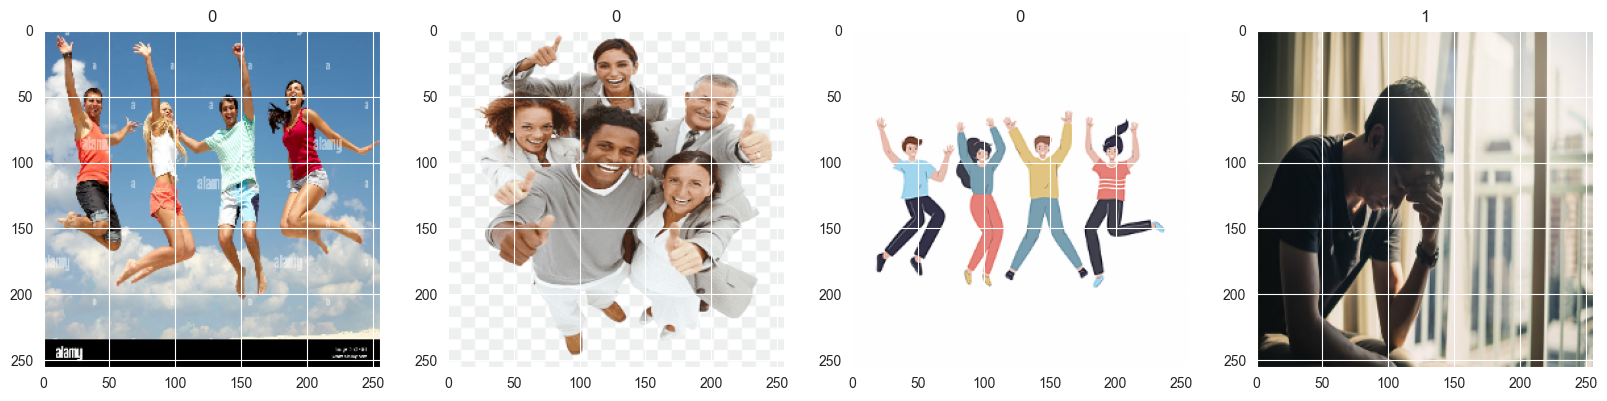

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### i.e 1 for sad and 0 for happy people

### Data Preprocessing

In [85]:
# Adding transformation to the data pipeline
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()

In [86]:
batch = scaled_iterator.next()
batch[0].max()

np.float32(1.0)

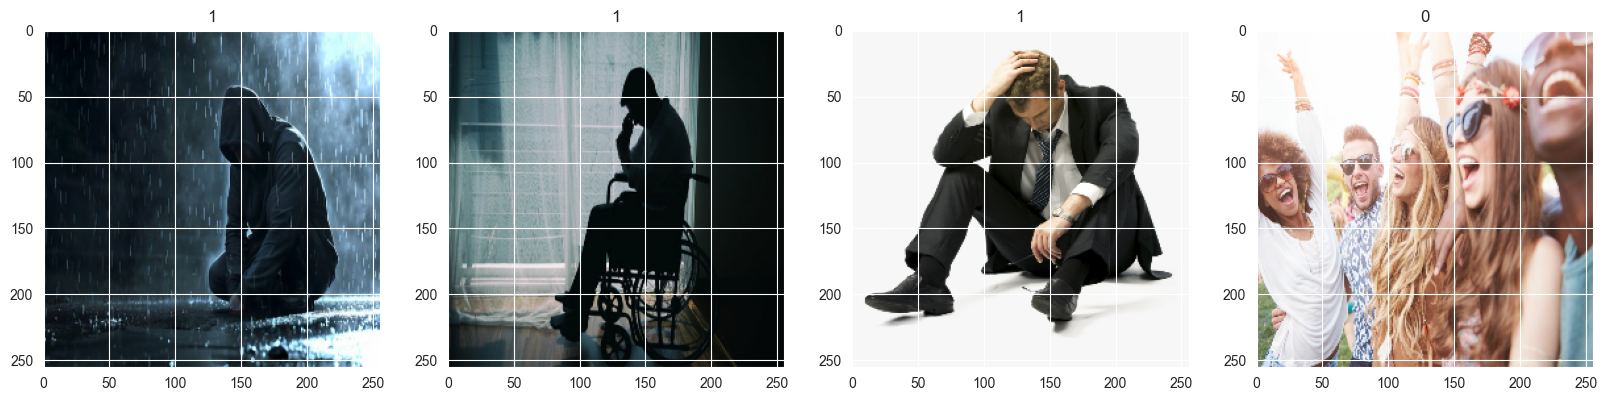

In [87]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [89]:
len(data)

15

In [91]:
TRAIN_SIZE = int(len(data)*0.7)
TEST_SIZE = int(len(data)*0.1) + 1 
VAL_SIZE = int(len(data)*0.2)

TRAIN_SIZE, TEST_SIZE, VAL_SIZE

(10, 2, 3)

In [92]:
# Splitting data Here ....
train = data.take(TRAIN_SIZE)
val = data.skip(TRAIN_SIZE).take(VAL_SIZE)
test = data.skip(TRAIN_SIZE + VAL_SIZE).take(VAL_SIZE)

# Modeling 

In [94]:
### Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [95]:
# model = Sequential([Conv2D(), ... ])
model = Sequential() # Instance of Sequential Layer

In [96]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\Study\AI_Notebooks\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', ])

In [99]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [100]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.5709 - loss: 1.1679 - val_accuracy: 0.4167 - val_loss: 0.6906
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.5755 - loss: 0.6942 - val_accuracy: 0.7500 - val_loss: 0.6718
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.8258 - loss: 0.6631 - val_accuracy: 0.7500 - val_loss: 0.6501
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.7495 - loss: 0.6196 - val_accuracy: 0.8750 - val_loss: 0.5010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.7032 - loss: 0.5616 - val_accuracy: 0.7500 - val_loss: 0.4895
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7886 - loss: 0.4354 - val_accuracy: 0.8750 - val_loss: 0.3386
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9029 - loss: 0.2930 - val_accuracy: 0.9167 - val_loss: 0.2341
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9065 - loss: 0.2586 - val_accuracy: 0.

### Plotting Performance

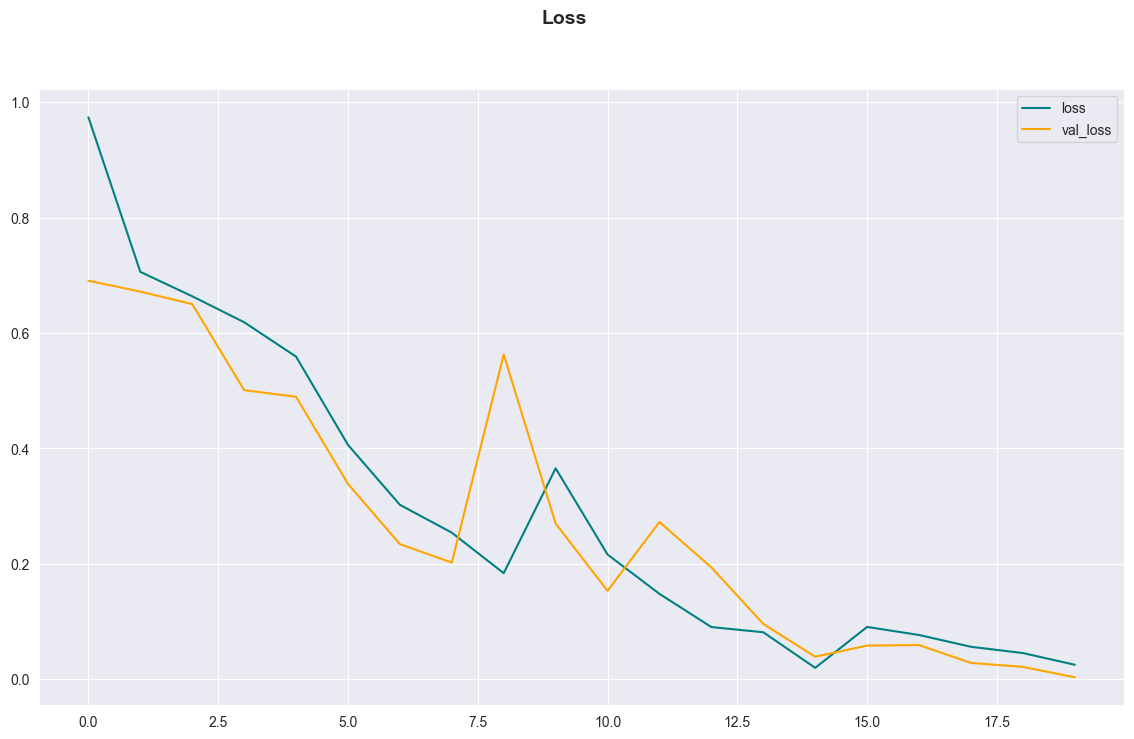

In [105]:
fig = plt.figure(figsize=(14, 8))
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

# Evaluate

In [106]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [107]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [108]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [109]:
pre.result(), re.result(), acc.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)